Avg Score of episode  50 is 28.66
Avg Score of episode  100 is 35.31
Avg Score of episode  150 is 48.8
Avg Score of episode  200 is 51.56
Avg Score of episode  250 is 56.42
Avg Score of episode  300 is 62.36
Avg Score of episode  350 is 61.48
Avg Score of episode  400 is 67.45
Avg Score of episode  450 is 73.02
Avg Score of episode  500 is 114.8
Avg Score of episode  550 is 121.31
Avg Score of episode  600 is 117.21
Avg Score of episode  650 is 171.49
Avg Score of episode  700 is 197.7
Avg Score of episode  750 is 198.65
Avg Score of episode  800 is 196.9
Avg Score of episode  850 is 155.91
Avg Score of episode  900 is 106.4
Avg Score of episode  950 is 131.87
Avg Score of episode  1000 is 174.81
Avg Score of episode  1050 is 169.61
Avg Score of episode  1100 is 178.39
Avg Score of episode  1150 is 198.81
Avg Score of episode  1200 is 185.25
Avg Score of episode  1250 is 185.34
Avg Score of episode  1300 is 198.9


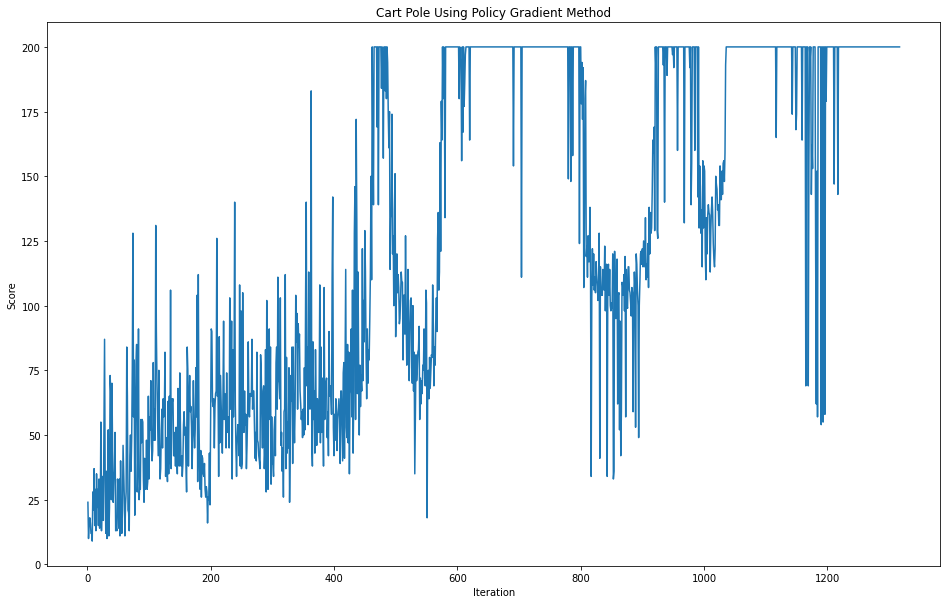

In [103]:
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import torch
torch.manual_seed(0)
import gym

class CartPole(torch.nn.Module):
  def __init__(self, state_size=4, action_size=2, hidden_size=32):
    super(CartPole, self).__init__()
    self.scores = []
    self.environment = gym.make('CartPole-v0')
    self.environment.seed(20)
    if torch.cuda.is_available():
      self.device = torch.device("cuda:0")
    else:
      self.device = torch.device("cpu")

  def constructModel(self):
    self.inputLayer = torch.nn.Linear(4, 32)
    self.hiddenLayer = torch.nn.Linear(32, 2)
  
  def forward(self, state):
      return torch.nn.functional.softmax(self.hiddenLayer(torch.nn.functional.relu(self.inputLayer(state))), dim=1)
  
  def act(self, state):
      state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
      probs = self.forward(state).cpu()
      model = torch.distributions.Categorical(probs)
      action = model.sample()
      return action.item(), model.log_prob(action)

  def train(self):
    self.spi = deque(maxlen=100)
    self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=1e-2)
    self.train_(episodes=5000)

  def plotScores(self):
    fig = plt.figure()
    plt.plot(np.arange(1, np.shape(self.scores)[0]+1), self.scores)
    plt.ylabel('Score')
    plt.xlabel('Iteration')
    plt.title('Cart Pole Using Policy Gradient Method')
    plt.show()

  def setPolicy(self):
      self.policy =  model.to(model.device)

  def train_(self,episodes=1000):
      gama=1.0;
      for k in range(1, episodes):
          rSum = 0;
          loss = []
          MMU = []
          reward = []
          x = self.environment.reset()
          for t in range(1000):
              action, log_prob = self.act(x)
              MMU.append(log_prob)
              x, reward_, flag, _ = self.environment.step(action)
              reward.append(reward_)
              if flag:
                  self.spi.append(sum(reward))
                  self.scores.append(sum(reward))
                  break
          
          discounts = [gama ** i for i in range(np.shape(reward)[0] + 1)]
          for a,b in zip(discounts, reward):
            rSum += a * b 
          
          for log_prob in MMU:
              loss.append(-log_prob * rSum)
          loss = torch.cat(loss).sum()       
          self.optimizer.zero_grad()
          loss.backward()
          self.optimizer.step()
          
          if (k%50 == 0):
            print('Avg Score of episode ', k, 'is', np.mean(self.spi))
          if np.mean(self.spi) >= 200:
            break

if __name__ == "__main__":
  model = CartPole()
  model.constructModel()
  model.setPolicy()
  model.train()
  model.plotScores()